# Unsupervised Learning - Clustering
Visualization of the data clustering and the dimension reduction, from the dataset containing pixels whose intensity vary over the 48 000 images (saved in train_changing_pixels_df.csv)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.sparse import csr_matrix

In [6]:
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

In [7]:
#Loading datasets
train_changing_pixels_df = pd.read_csv('train_changing_pixels_DB.csv', index_col=0)
train_simplified_pixels_df = pd.read_csv('train_simplified_pixels_DB.csv', index_col=0)
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')
#print(train_changing_pixels_df.head())
#print(train_simplified_pixels_df.head())
#print(train.head())

#Pixels with constant intensities that have been dropped in the train_changing_pixels_df
DROPPED_PIX = ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 
               'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 
               'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 
               'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 
               'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 
               'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 
               'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 
               'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 
               'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

## Clustering visualizations

In [8]:
#Preparing samples and labels arrays
s = np.random.randint(low=0, high=42001, size=8200).tolist()
samples = train_changing_pixels_df.iloc[s, :].values
digits = train.iloc[s, :]['label'].tolist()
print(samples.shape)

(8400, 708)


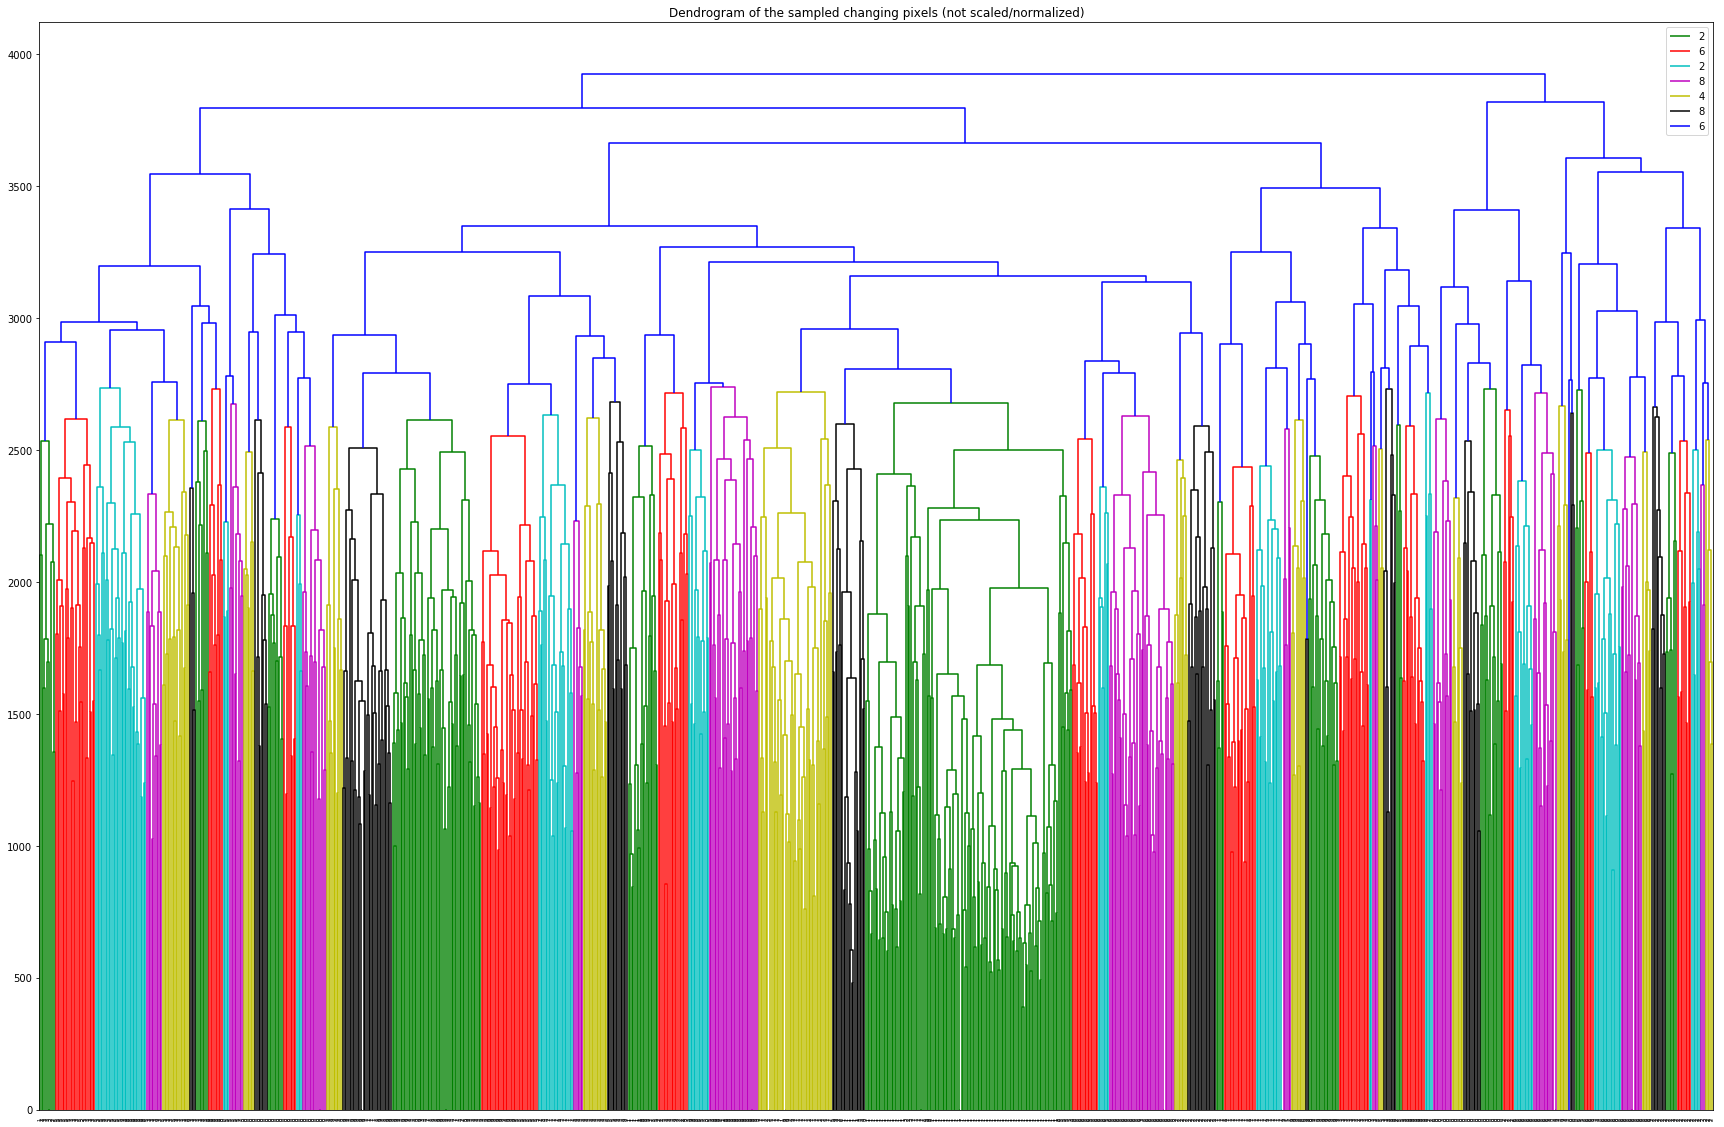

In [29]:
#Dendrogram of the clustering of data
mergings = linkage(samples, method='complete')
_ = plt.figure(figsize=(30,20))
_ = dendrogram(mergings, labels=digits)
_ = plt.title('Dendrogram of the sampled changing pixels (not scaled/normalized)')
_ = plt.legend(digits)
_ = plt.savefig('visualizations/Dendrogram.png')
plt.show()

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

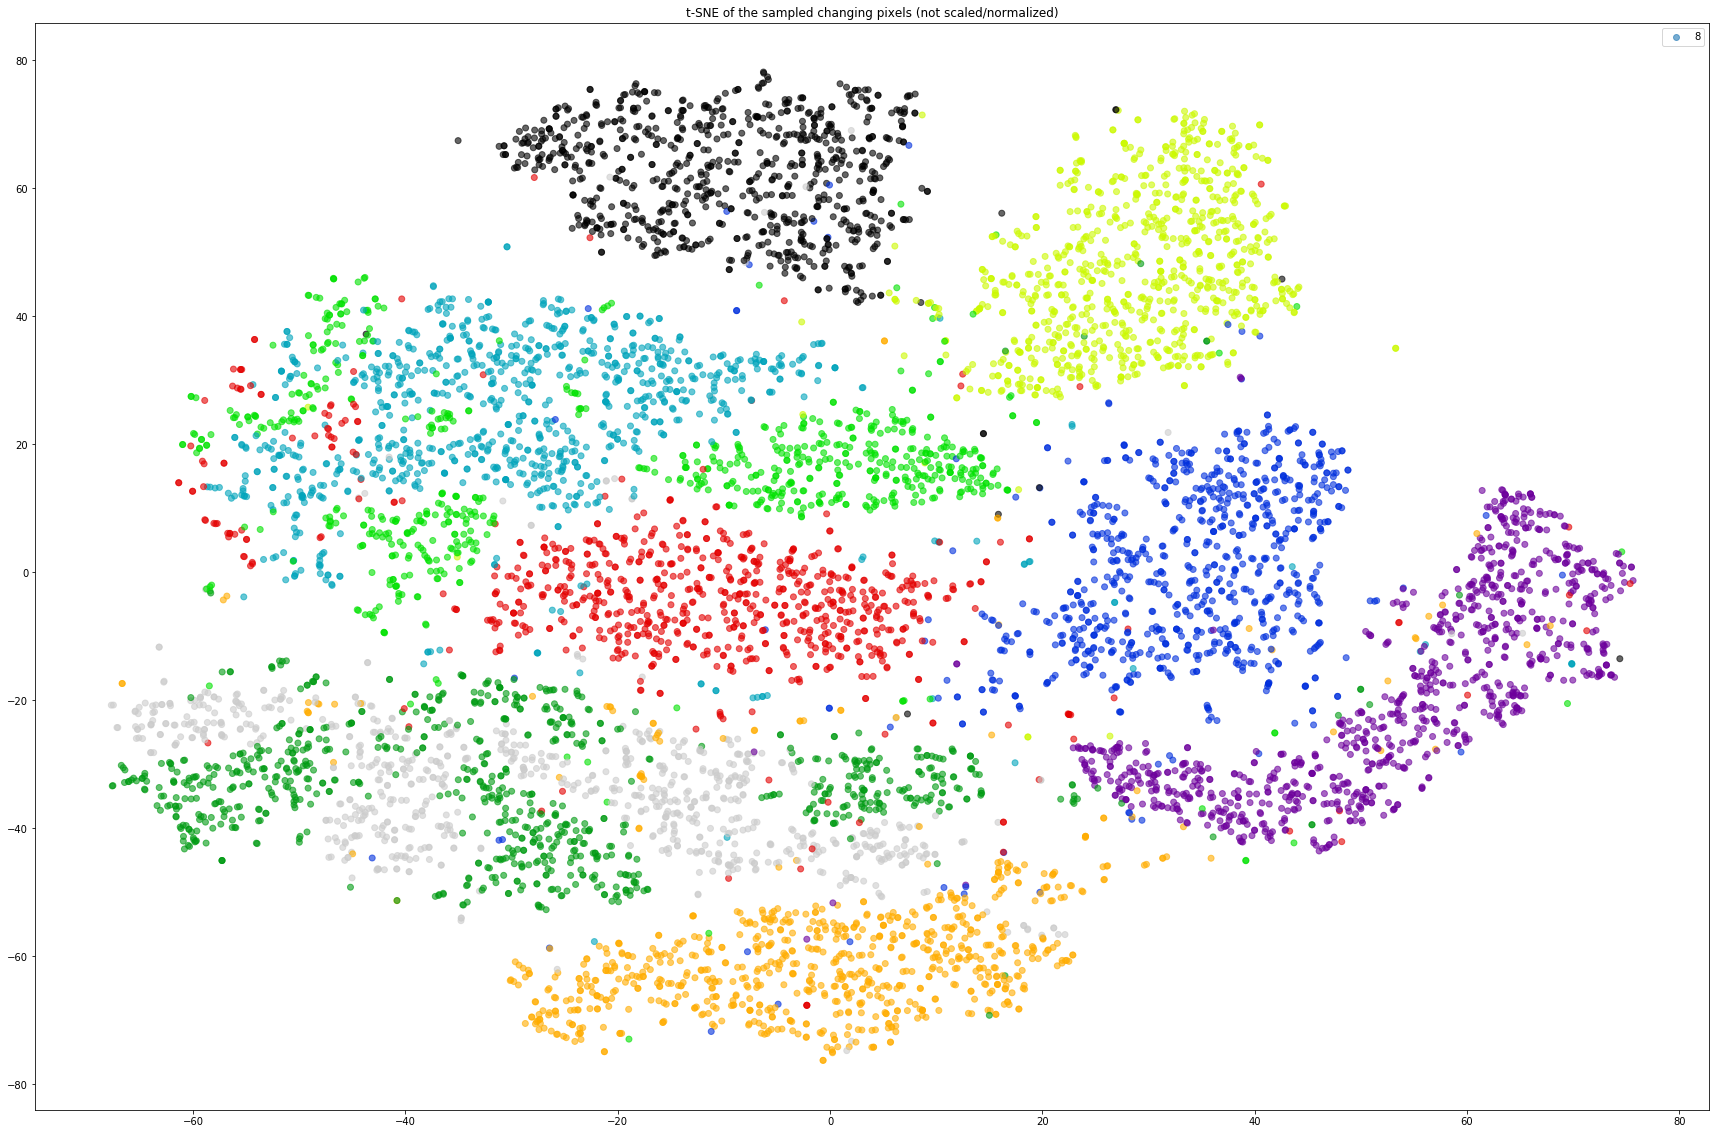

In [14]:
#t-SNE visualization of the data
model = TSNE(learning_rate=100)  #between 50-200
transformed = model.fit_transform(samples)
xs = transformed[:, 0]
ys = transformed[:, 1]
_ = plt.figure(figsize=(30,20))
_ = plt.scatter(xs, ys, c=digits, alpha=0.6, cmap = "nipy_spectral")
_ = plt.title('t-SNE of the sampled changing pixels (not scaled/normalized)')
_ = plt.legend(digits)
_ = plt.savefig('visualizations/t-SNE.png')
plt.show()

*For a sample of 8200 images (20% of the train set), the t-SNE displays 9 clusters, for the 10 digits of the dataset, that are clear. However, there are 2x2 digits that look harder to dissociate from each other.*

## Dimension Reduction
### Principal Components Analysis (PCA)

In [80]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=1050).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print(samples.shape)

(42000, 708)


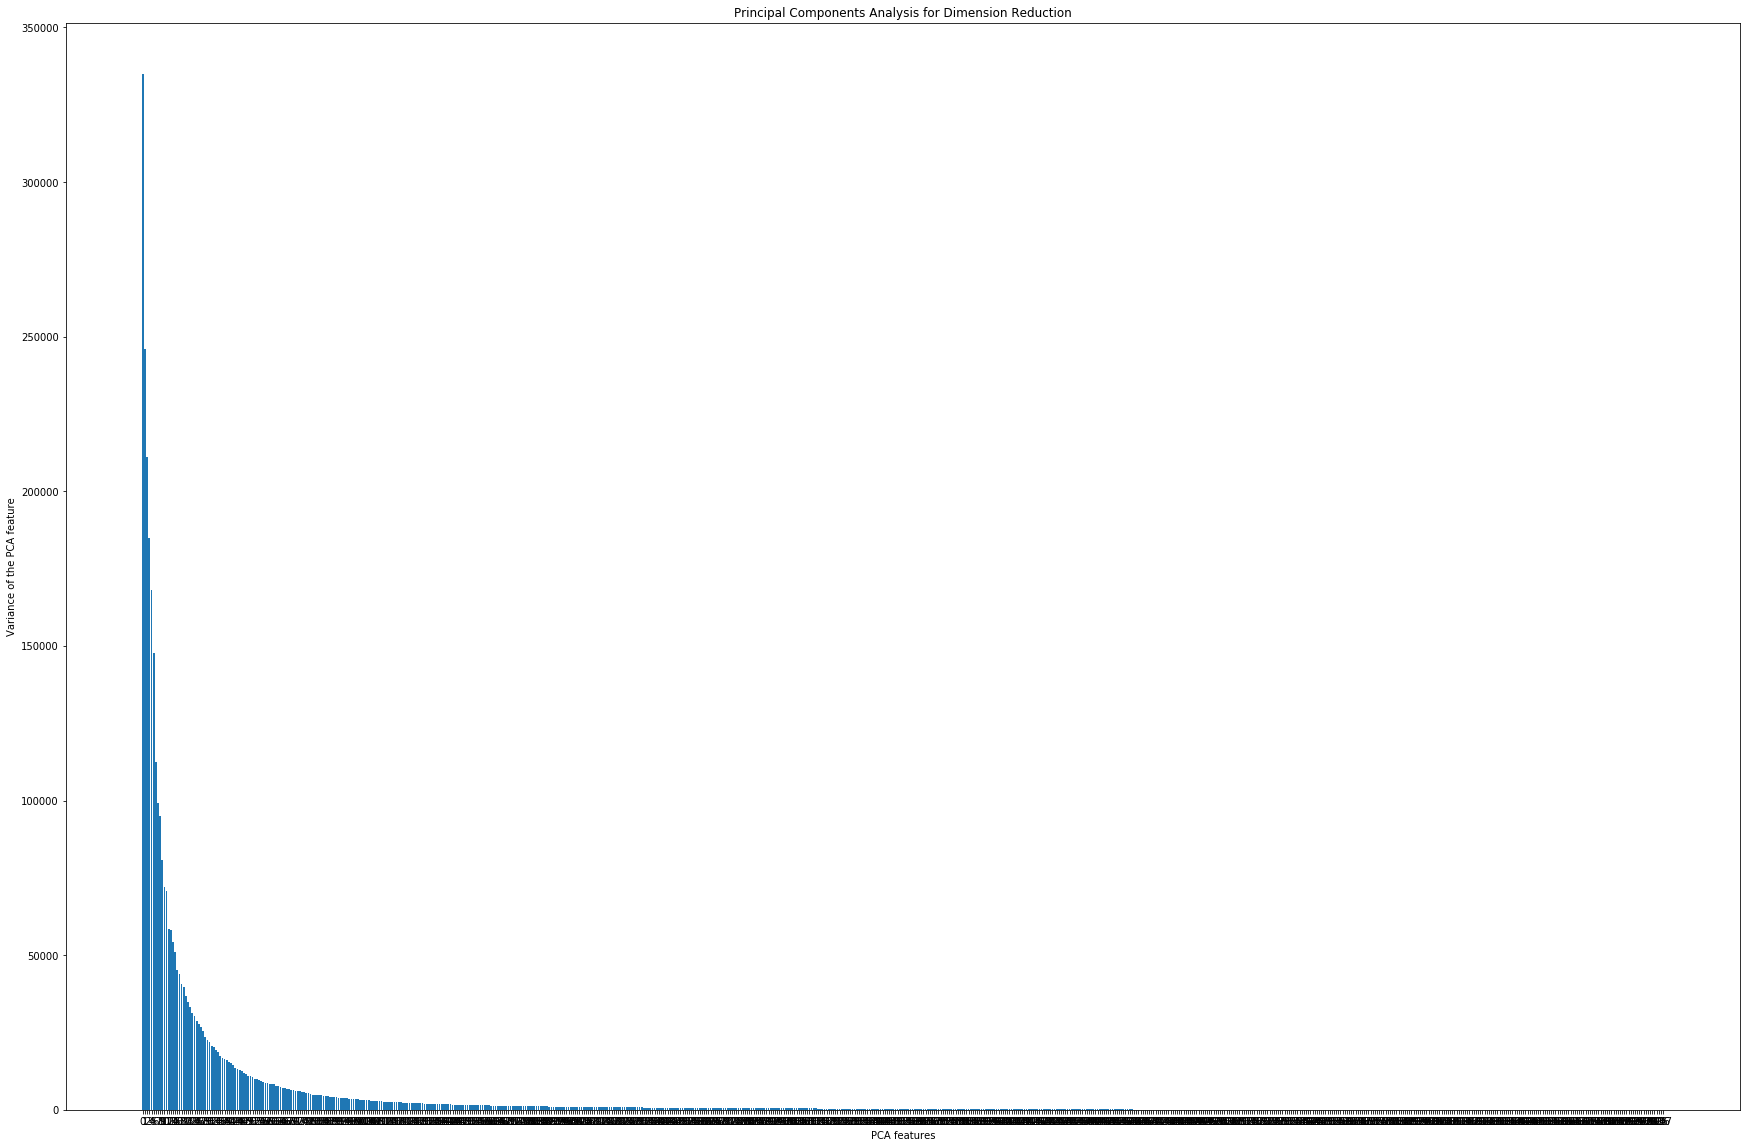

In [96]:
#PCA model
pca = PCA()
pca.fit(samples)

#PCA features variance visualization
pca_features = range(pca.n_components_)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(pca_features, pca.explained_variance_)
_ = plt.xticks(pca_features)
_ = plt.title('Principal Components Analysis for Dimension Reduction')
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

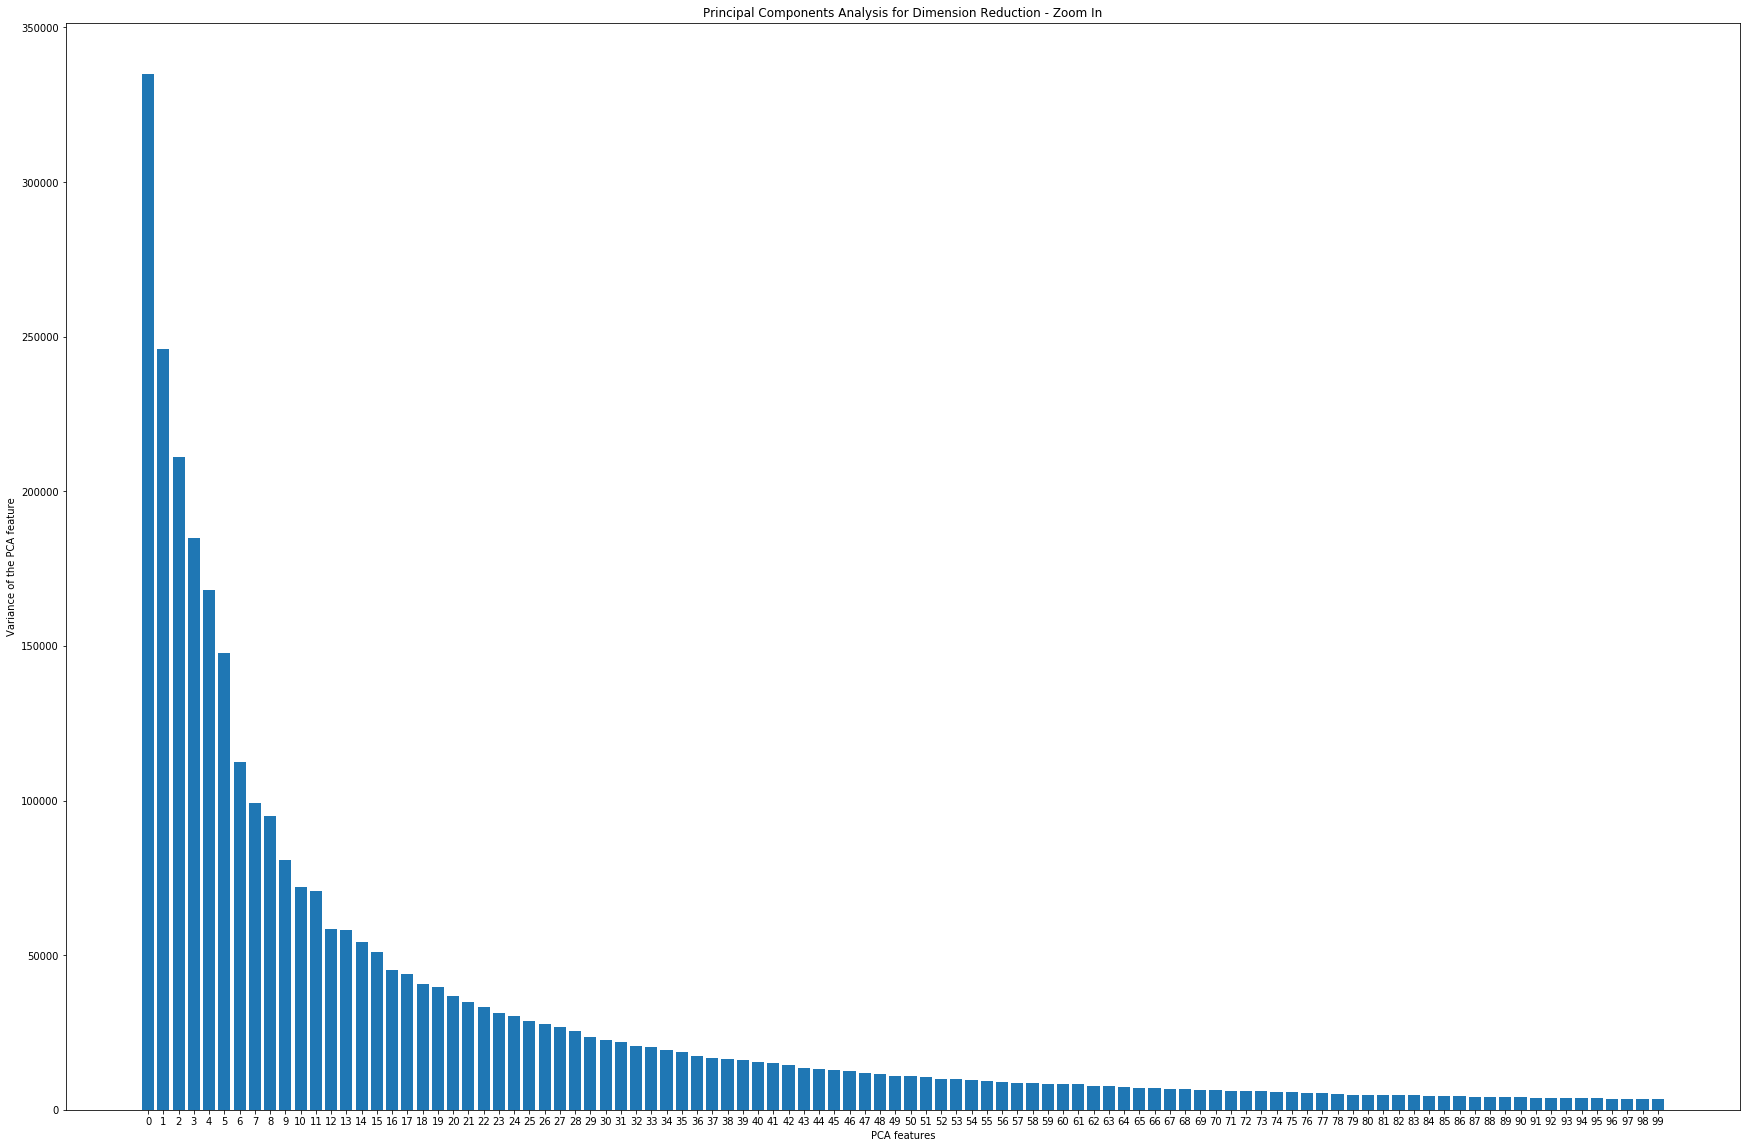

In [97]:
#PCA features variance visualization - ZOOM in
l= 100
x = range(l)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(x, pca.explained_variance_[:l])
_ = plt.xticks(x)
_ = plt.title('Principal Components Analysis for Dimension Reduction - Zoom In {} first features'.format(l))
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance_zoom.png')
plt.show()

*The best number of PCA features to keep (reduced dimension) is <80. The 1st PCA feature represents a lot of the variance, as the 5 following ones.*

[0.09599694 0.16667639 0.22760573 0.28233515 0.33090271 0.37439563
 0.48819304 0.73177081 0.85430126 0.89208592 0.91588801 0.96755568
 0.99614412 1.        ]


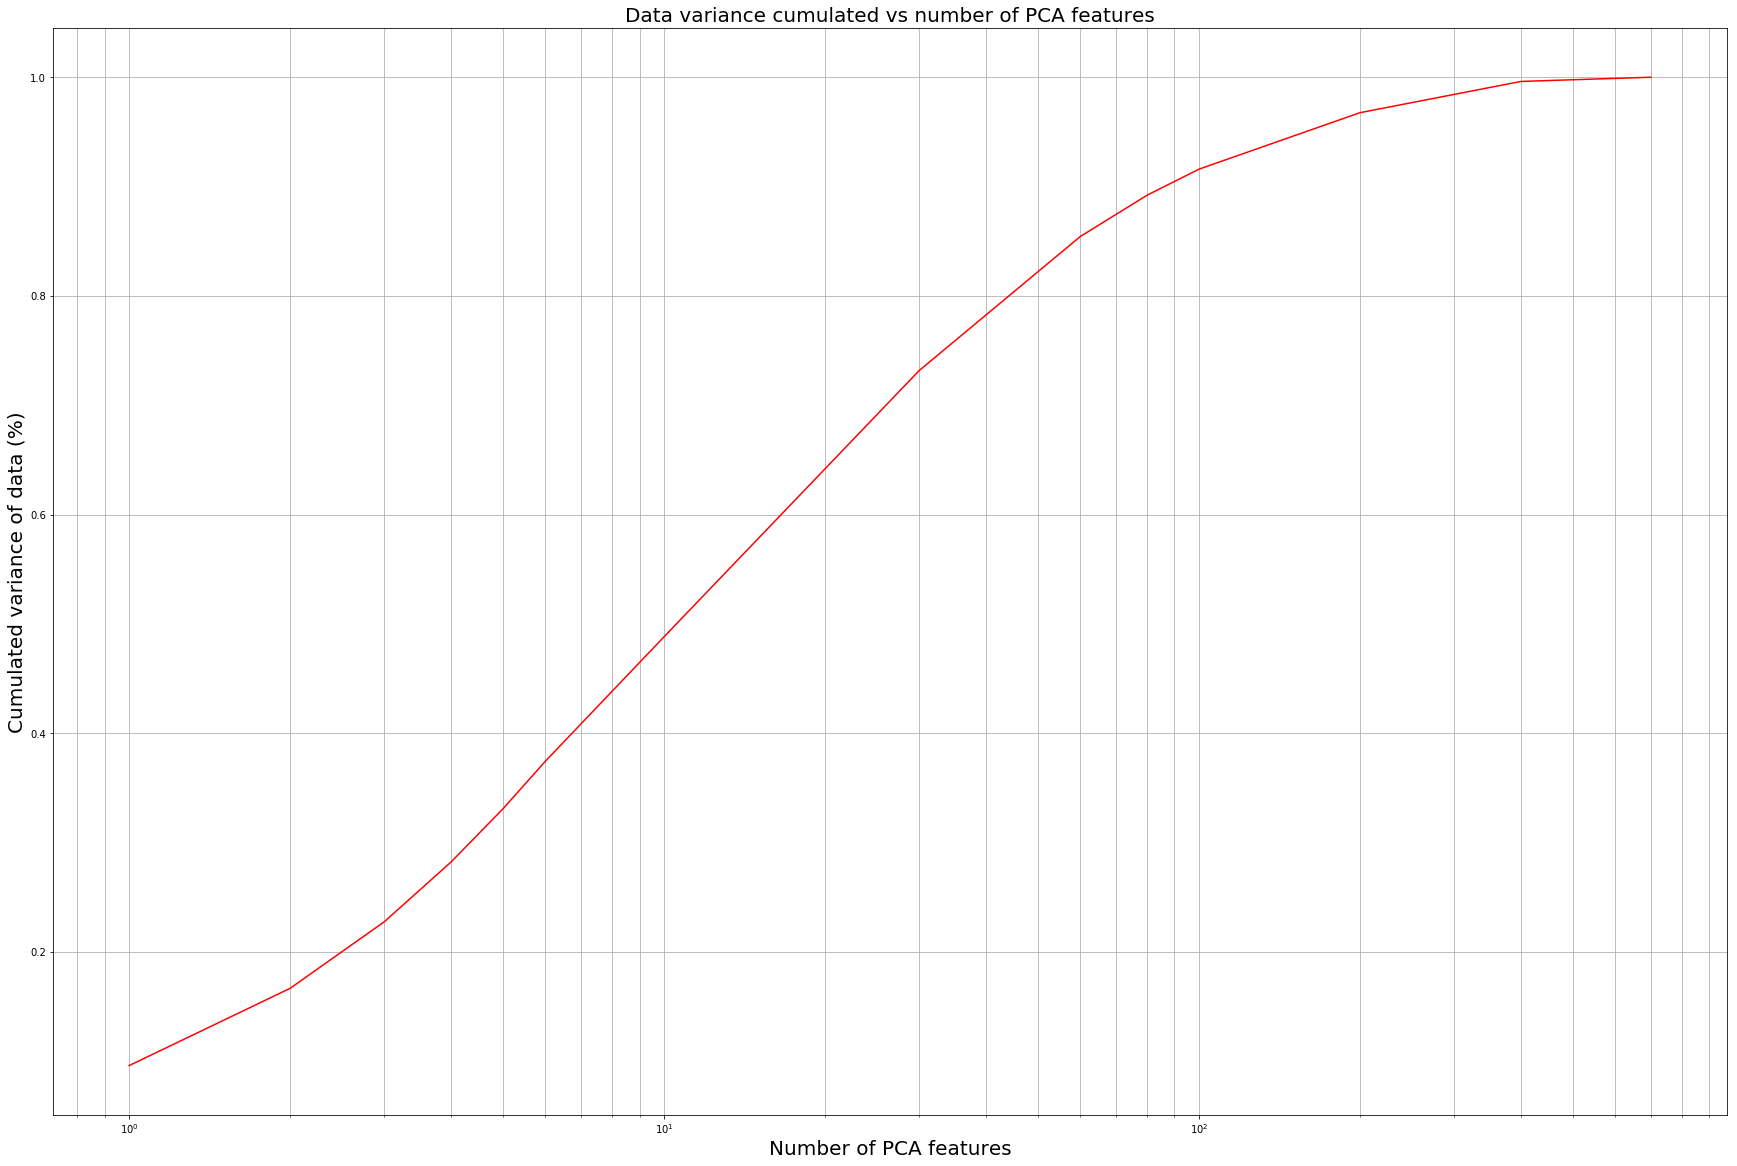

In [25]:
#Visualization of the variance of the data carried by the number of PCA features
n_components = np.array([1,2,3,4,5,6, 10, 30, 60, 80, 100, 200, 400, 700])
cumul_variance = np.empty(len(n_components))
for i, n in enumerate(n_components):
    pca = PCA(n_components=n)
    pca.fit(samples)
    cumul_variance[i] = np.sum(pca.explained_variance_ratio_)

print(cumul_variance)

_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(n_components, cumul_variance, color='red')
_ = plt.xscale('log')
_ = plt.xlabel('Number of PCA features', size=20)
_ = plt.ylabel('Cumulated variance of data (%)', size=20)
_ = plt.title('Data variance cumulated vs number of PCA features', size=20)
plt.savefig('visualizations/cumulated variance_pca features.png')
plt.show()

*50% of the data variance is carried by 10 pCA features, and 90% of the data variance is carried by 80 PCA features (vs 708 features initially). The reduction is huge !*

### sparce matrix + TruncatedSVD
As the pixel inteisties present a lot of 0 values, we can turn the train 2D array into a sparse matrix to reduce the memory size

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [ ]:
#sparse_matrix = 

## Clustering models

In [53]:
#Preparing samples and labels arrays
#s = np.random.randint(low=0, high=42001, size=42000).tolist()
samples = train_changing_pixels_df.values  #.iloc[s, :]
digits = train['label'].tolist()  #.iloc[s, :]
print("Shape of samples: {}".format(samples.shape))

Shape of samples: (42000, 708)


In [98]:
%%time

#K-Means clustering
pipeline = make_pipeline(PCA(n_components=80),    
                         KMeans(n_clusters=10))  #10 digits to identify
pipeline.fit(samples)
labels = pipeline.predict(samples)

#Predictions on holdout set
X_holdout = holdout.drop(columns=DROPPED_PIX).values
predictions = pipeline.predict(X_holdout)  #/!!\ predicted labels don't correspond to digits !

#Cross-tabulation
df = pd.DataFrame({'clusters_labels': labels, 'digits': digits })
cross_tab= pd.crosstab(df['clusters_labels'], df['digits'])
print(cross_tab)

#cluster-digits matching dict
cluster_digit_dict = {}
for i, row in cross_tab.iterrows():
    cluster_digit_dict[i] = row.idxmax()
print(cluster_digit_dict)

#Submission form
submission_df = pd.DataFrame({'ImageId': range(1,28001), 'cluster_label': predictions})
submission_df['Label'] = submission_df['cluster_label'].map(cluster_digit_dict)
submission_df.drop(columns=['cluster_label'], inplace=True)
submission_df.to_csv('submission_pca_kmeans_DB.csv', index=False)

digits              0     1     2     3     4     5     6     7     8     9
clusters_labels                                                            
0                 151    12   158    52   120    90  3428     7    40     9
1                   2     8    20    97  1023   109     0  1613   140  1678
2                  10    46  3335   157    27    44   166    63    45     5
3                   0  2153    67     6    44    15    18    85    47    20
4                   0  2398    44    43    23     7    16    59    37    24
5                  14     1    90    66  1631   140   102   531   109  1161
6                 369    35    82   794    90  1783   271    16  2249    58
7                 107    24   282  3090     2  1464    21     8  1248    74
8                3474     0    60    34    11    86   113    38    24    31
9                   5     7    39    12  1101    57     2  1981   124  1128
{0: 6, 1: 9, 2: 2, 3: 1, 4: 1, 5: 4, 6: 8, 7: 3, 8: 0, 9: 7}
Wall time: 1min 3s
